In [1]:
%pylab inline
%config Completer.use_jedi = False

Populating the interactive namespace from numpy and matplotlib


In [55]:
import numpy as np
import astropy

from astropy.coordinates import SkyCoord
import astropy.units as u


In [58]:
# Load the CFHTlens data
chftlens_data_path = './martin_Gals/cfhtlens_W3_ok.txt'

mb_data = np.loadtxt(chftlens_data_path)

mb_headers = [
    'ALPHA_J2000',  
    'DELTA_J2000',     
    'MAG_u' , 
    'MAGERR_u',    
    'MAG_g',  
    'MAGERR_g',     
    'MAG_r' , 
    'MAGERR_r',     
    'MAG_i' , 
    'MAGERR_i',     
    'MAG_y' , 
    'MAGERR_y' ,    
    'MAG_z' , 
    'MAGERR_z', 
] 

mb_data.shape

(1407741, 14)

In [10]:
from astropy.io import ascii

# Load the multi-band catalogue, matched with spectroscopic DEEP2+3 measurements
multi_band_v2_data_path = './multi-band_UNIONS/w3.ugriz.spec.txt'

unions_data = ascii.read(multi_band_v2_data_path)


In [59]:
# Print the catalogue
print(unions_data) 
print('Data keys: ', unions_data.keys())


     RA        Dec        CFIS_ID      u    u_err ... z_err   sg  z_spec zero
----------- ---------- ------------- ------ ----- ... ----- ----- ------ ----
214.5213675 52.7520212 2258286007117 21.542 0.029 ... 0.011 2.265 0.2444  0.0
214.5722966 52.7502435 2258286007145  -99.0 -99.0 ...  0.11 1.751 1.4011  0.0
214.4421597 52.7506248 2258286007149  -99.0 -99.0 ... 0.178 1.206 0.6853  0.0
 214.416452 52.7510622 2258286007153  -99.0 -99.0 ... 0.089 1.611 1.1246  0.0
214.4705147 52.7509707 2258286007155  -99.0 -99.0 ... -99.0 1.668 0.6144  0.0
 214.528252 52.7604401 2258286007158 21.883 0.051 ... 0.004 3.013 0.0642  0.0
214.5280835 52.7520947 2258286007168 22.562 0.061 ... 0.019 1.316 0.8177  0.0
214.4446289  52.752225 2258286007176  -99.0 -99.0 ... 0.039 1.589 0.6812  0.0
214.5325164 52.7517289 2258286007177  -99.0 -99.0 ... -99.0 1.113 0.6777  0.0
214.5087224 52.7534348 2258286007197 23.736 0.125 ...  0.01 1.317 1.3635  0.0
        ...        ...           ...    ...   ... ...   ...   ..

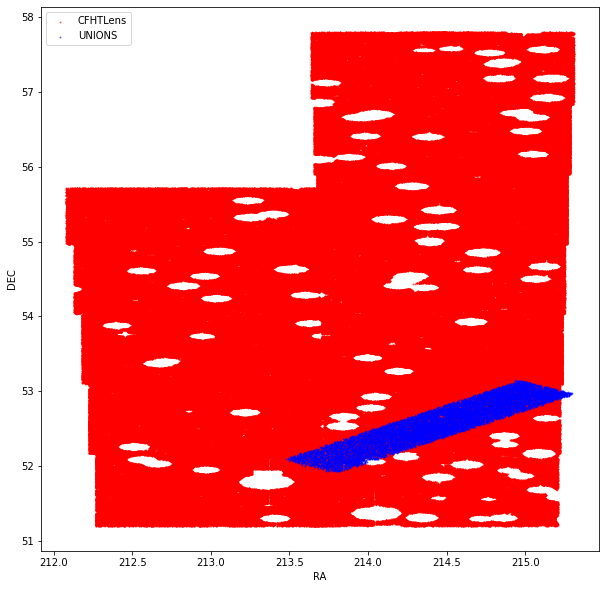

In [62]:
# Plot the positions
plt.figure(figsize=(10,10))
plt.scatter(mb_data[:,0], mb_data[:,1], c='red', s=1, alpha=0.5, label='CFHTLens')
plt.scatter(unions_data['RA'], unions_data['Dec'], c='blue', s=1, alpha=0.5, label='UNIONS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.show()



In [24]:
# Prepare coordinates
coord_cfhtlens = SkyCoord(ra=mb_data[:,0], dec=mb_data[:,1], unit='deg')
coord_unions = SkyCoord(ra=unions_data['RA'], dec=unions_data['Dec'], unit='deg')


In [25]:
# Match catalogues
# First catalogue is the one to be matched on the indexes of the second one
idx, sep2d, dist3d = astropy.coordinates.match_coordinates_sky(
    coord_unions,
    coord_cfhtlens,
)


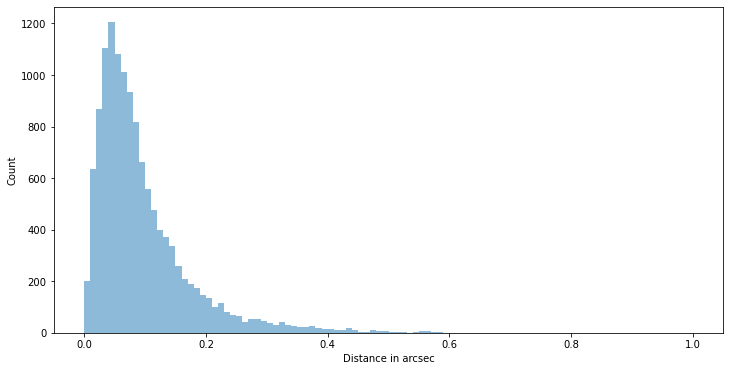

In [54]:
# Plot the histogram of the distance in the matching 
plt.figure(figsize=(12,6))
plt.hist(sep2d.to('arcsec').value, bins=100, alpha=0.5, range=[0,1])
plt.xlabel('Distance in arcsec')
plt.ylabel('Count')
plt.show()



In [50]:
# Create a mask for the unions elements outside the cfhtlens footprint
mask = sep2d < 0.6 * u.arcsec

idx = idx[mask]
sep2d = sep2d[mask]


In [52]:
# The idx represent the indexes of the cfhtlens catalog that match the
# corresponding element in the unions catalogue
# For example, see below:
print(idx[0])

print(coord_cfhtlens[idx[0]])
print(coord_unions[0])


335833
<SkyCoord (ICRS): (ra, dec) in deg
    (214.5213669, 52.7520248)>
<SkyCoord (ICRS): (ra, dec) in deg
    (214.5213675, 52.7520212)>
